In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import sys
import os


from pathlib import Path
from cstreet import *

/data1/home/jyj/miniconda3/envs/py_cstreet/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_PATH = Path("/data3/projects/2025_GTRA/data/2_HSPC")
adata = sc.read_h5ad(DATA_PATH / "HSPC_preproc.h5ad")
top_genes = pd.read_csv(DATA_PATH / "HVG_genes.txt").values.reshape(-1).tolist()

In [3]:
# obs, var 전체를 문자열로 변환
adata.obs = adata.obs.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
adata.var_names = adata.var_names.map(lambda x: x.decode() if isinstance(x, bytes) else str(x))

In [4]:
celltype_mapping = {
    "myel. prog. #1": "MYP",
    "myel. prog. #2": "MYP",
    "myel. prog. #3":"MYP",
    'ery. prog. #1':"EryP",
    'ery. prog. #2':"EryP",
    'ery. prog. #3':"EryP",
    "HSCs #1":"HSCs",
    "HSCs #2":"HSCs",
    "LMPPs #1":"LMPPs",
    "LMPPs #2":"LMPPs",
    "MK prog.":"MKP",
    "eosinophil prog.":"eosiP"
}

adata.obs["celltype"] = adata.obs["clusters"].map(celltype_mapping)

In [5]:
hspc_input = adata[:,top_genes]

In [6]:
np.unique(adata.obs["time"].values)

array(['24h', '3h', '72h', 'control'], dtype=object)

In [7]:
data1=hspc_input[(hspc_input.obs["time"]=="control"),]
data2=hspc_input[(hspc_input.obs["time"]=="3h"),]
data3=hspc_input[(hspc_input.obs["time"]=="24h"),]
data4=hspc_input[(hspc_input.obs["time"]=="72h"),]


In [8]:
state1=data1.obs["celltype"].tolist()
state2=data2.obs["celltype"].tolist()
state3=data3.obs["celltype"].tolist()
state4=data4.obs["celltype"].tolist()

In [9]:
cdata=CStreetData()

In [10]:
cdata.add_new_timepoint_scdata(data1.to_df(),state1)
cdata.add_new_timepoint_scdata(data2.to_df(),state2)
cdata.add_new_timepoint_scdata(data3.to_df(),state3)
cdata.add_new_timepoint_scdata(data4.to_df(),state4)

In [11]:
cdata.params.Output_Name="CStreet_HSPC"
cdata.params.Switch_Normalize=False
cdata.params.Switch_LogTransform=False

cdata.params.ProbParam_SamplingSize=50

cdata.params.Threshold_MinCellNumofStates=20
cdata.params.Threshold_MinProbability=0.09
cdata.params.WithinTimePointParam_k=25
cdata.params.BetweenTimePointParam_k=25
cdata.params.FigureParam_FigureSize=(10, 7)

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.



[Function: run_cstreet start...]


[Function: cell_clusters start...]

timepoint:1
clusters have been given
timepoint:2
clusters have been given
timepoint:3
clusters have been given
timepoint:4
clusters have been given

[Function: cell_clusters finished, spent time: 0.01s]


[Function: filter_dead_cell start...]

timepoint:1
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:2
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:3
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:4
filtered out 0 cells that are detected in more than 0.2 mito percent


[Function: filter_dead_cell finished, spent time: 0.04s]


[Function: filter_lowcell_gene start...]

timepoint:1
filtered out 294 genes that are detected in less than 3 cells

timepoint:2
filtered out 438 genes that are detected in less than 3 cells



Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


timepoint:3
filtered out 174 genes that are detected in less than 3 cells

timepoint:4
filtered out 286 genes that are detected in less than 3 cells


[Function: filter_lowcell_gene finished, spent time: 0.40s]


[Function: filter_lowgene_cells start...]

timepoint:1
filtered out 0 cells that are detected in less than 200 genes

timepoint:2
filtered out 0 cells that are detected in less than 200 genes

timepoint:3
filtered out 0 cells that are detected in less than 200 genes

timepoint:4
filtered out 0 cells that are detected in less than 200 genes


[Function: filter_lowgene_cells finished, spent time: 0.13s]


[Function: get_knn_within start...]

timepoint:1

timepoint:2

timepoint:3

timepoint:4


[Function: get_knn_within finished, spent time: 25.00s]


[Function: get_knn_between start...]

timepoint between 1 and 2 
timepoint between 2 and 3 
timepoint between 3 and 4 

[Function: get_knn_between finished, spent time: 25.80s]


[Function: get_knn_graph start...]

timepoint:1
timep

100%|██████████| 2000/2000 [00:00<00:00, 83442.17it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


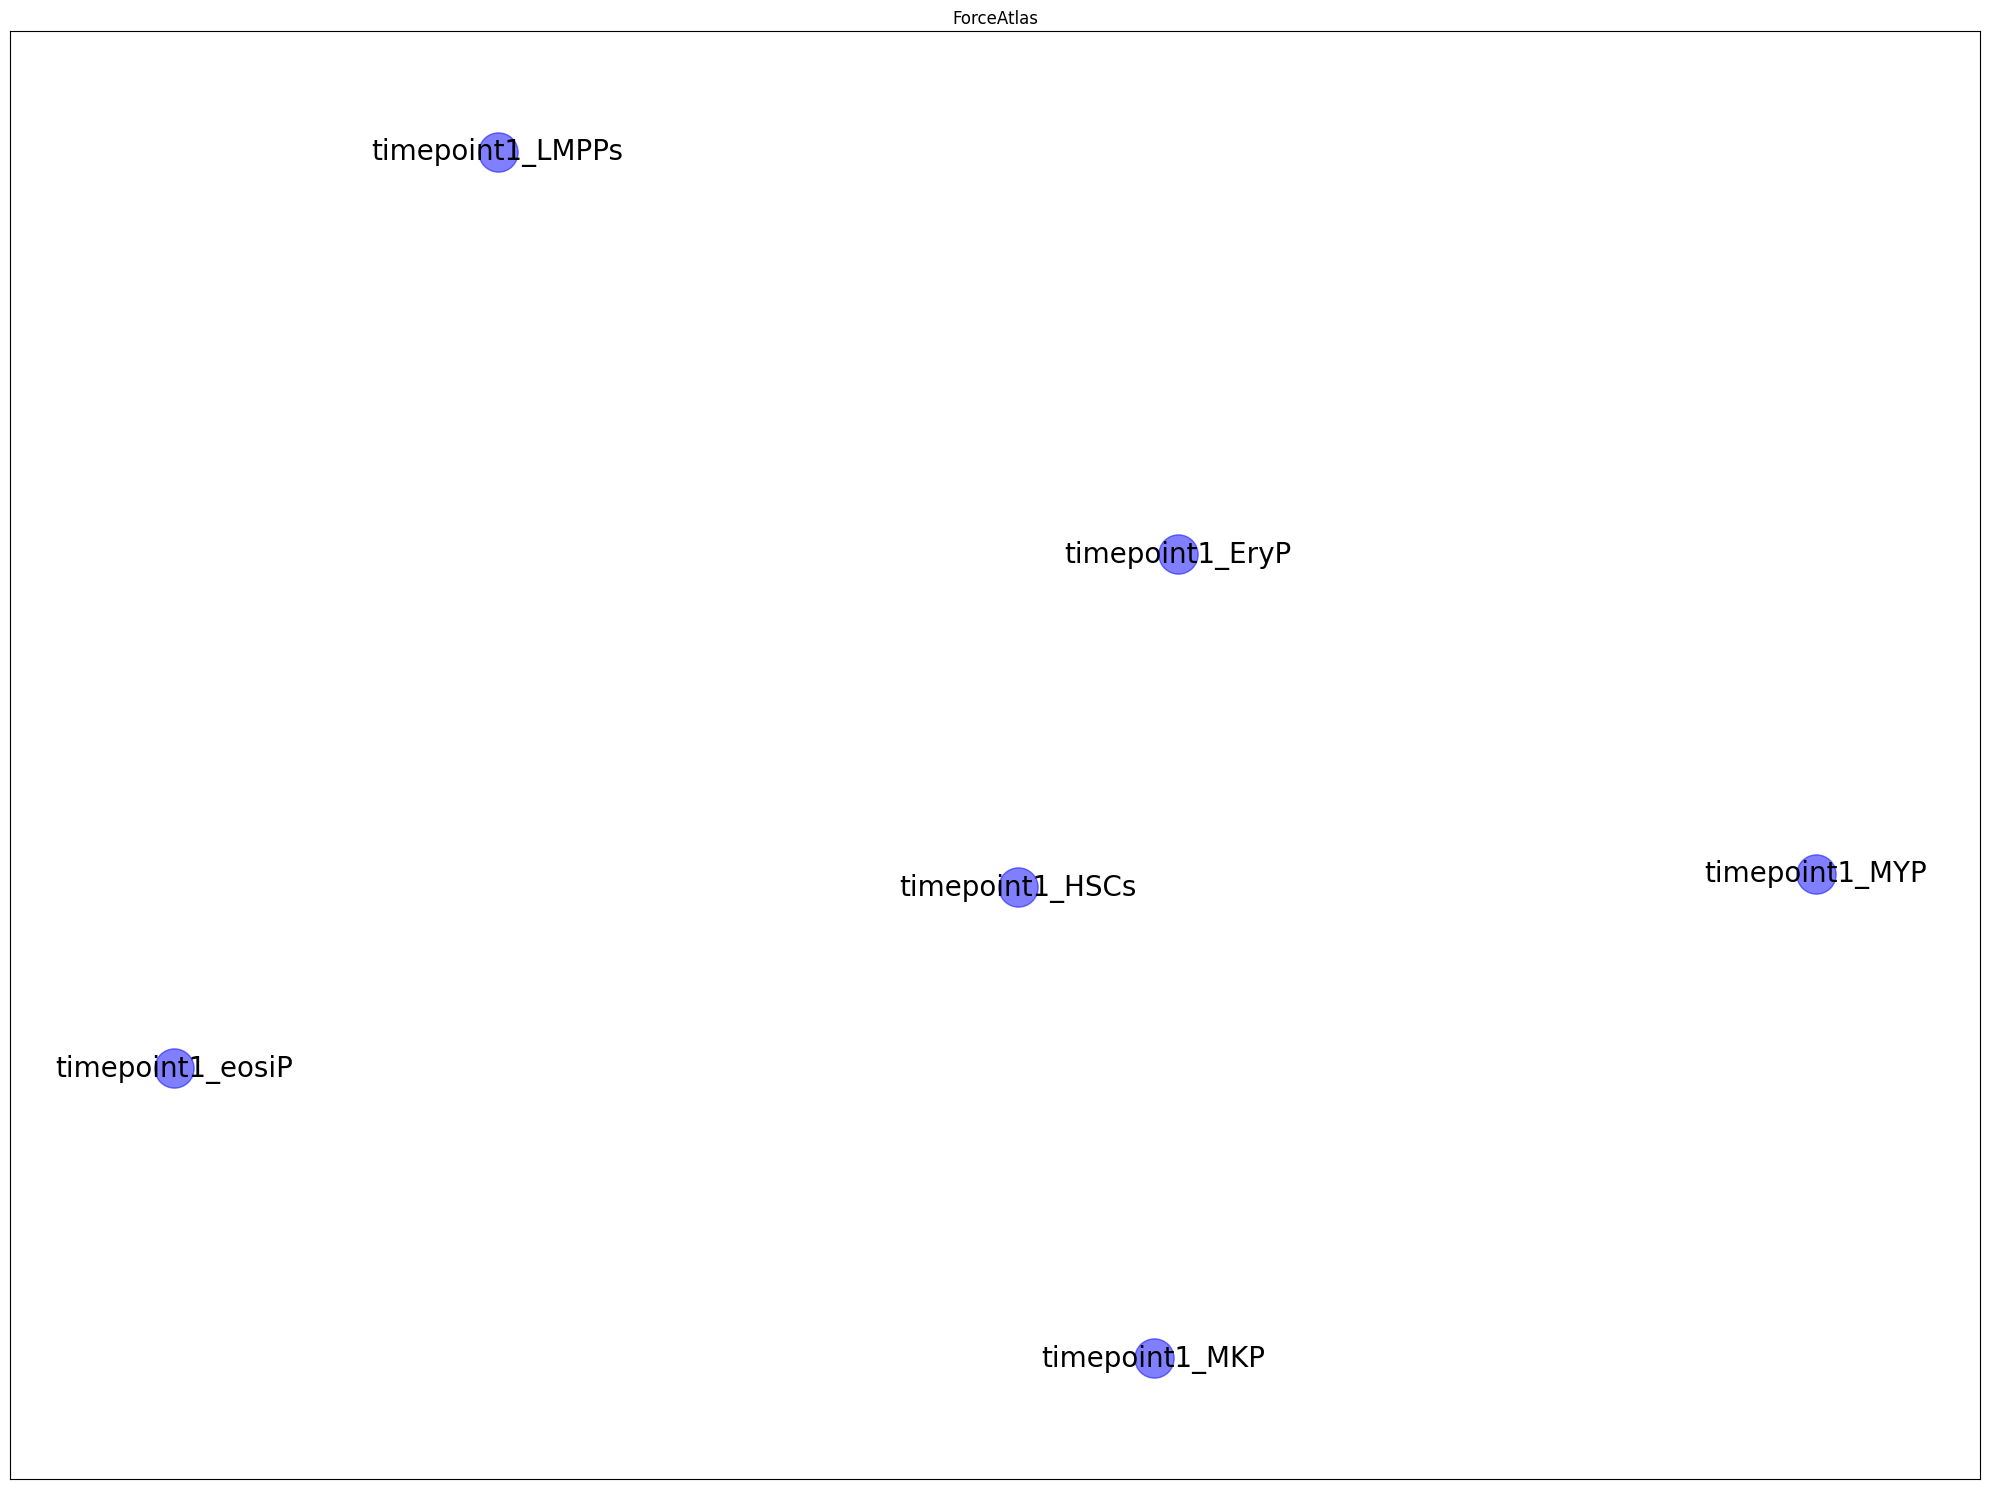

timepoint:2


100%|██████████| 2000/2000 [00:00<00:00, 83701.94it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


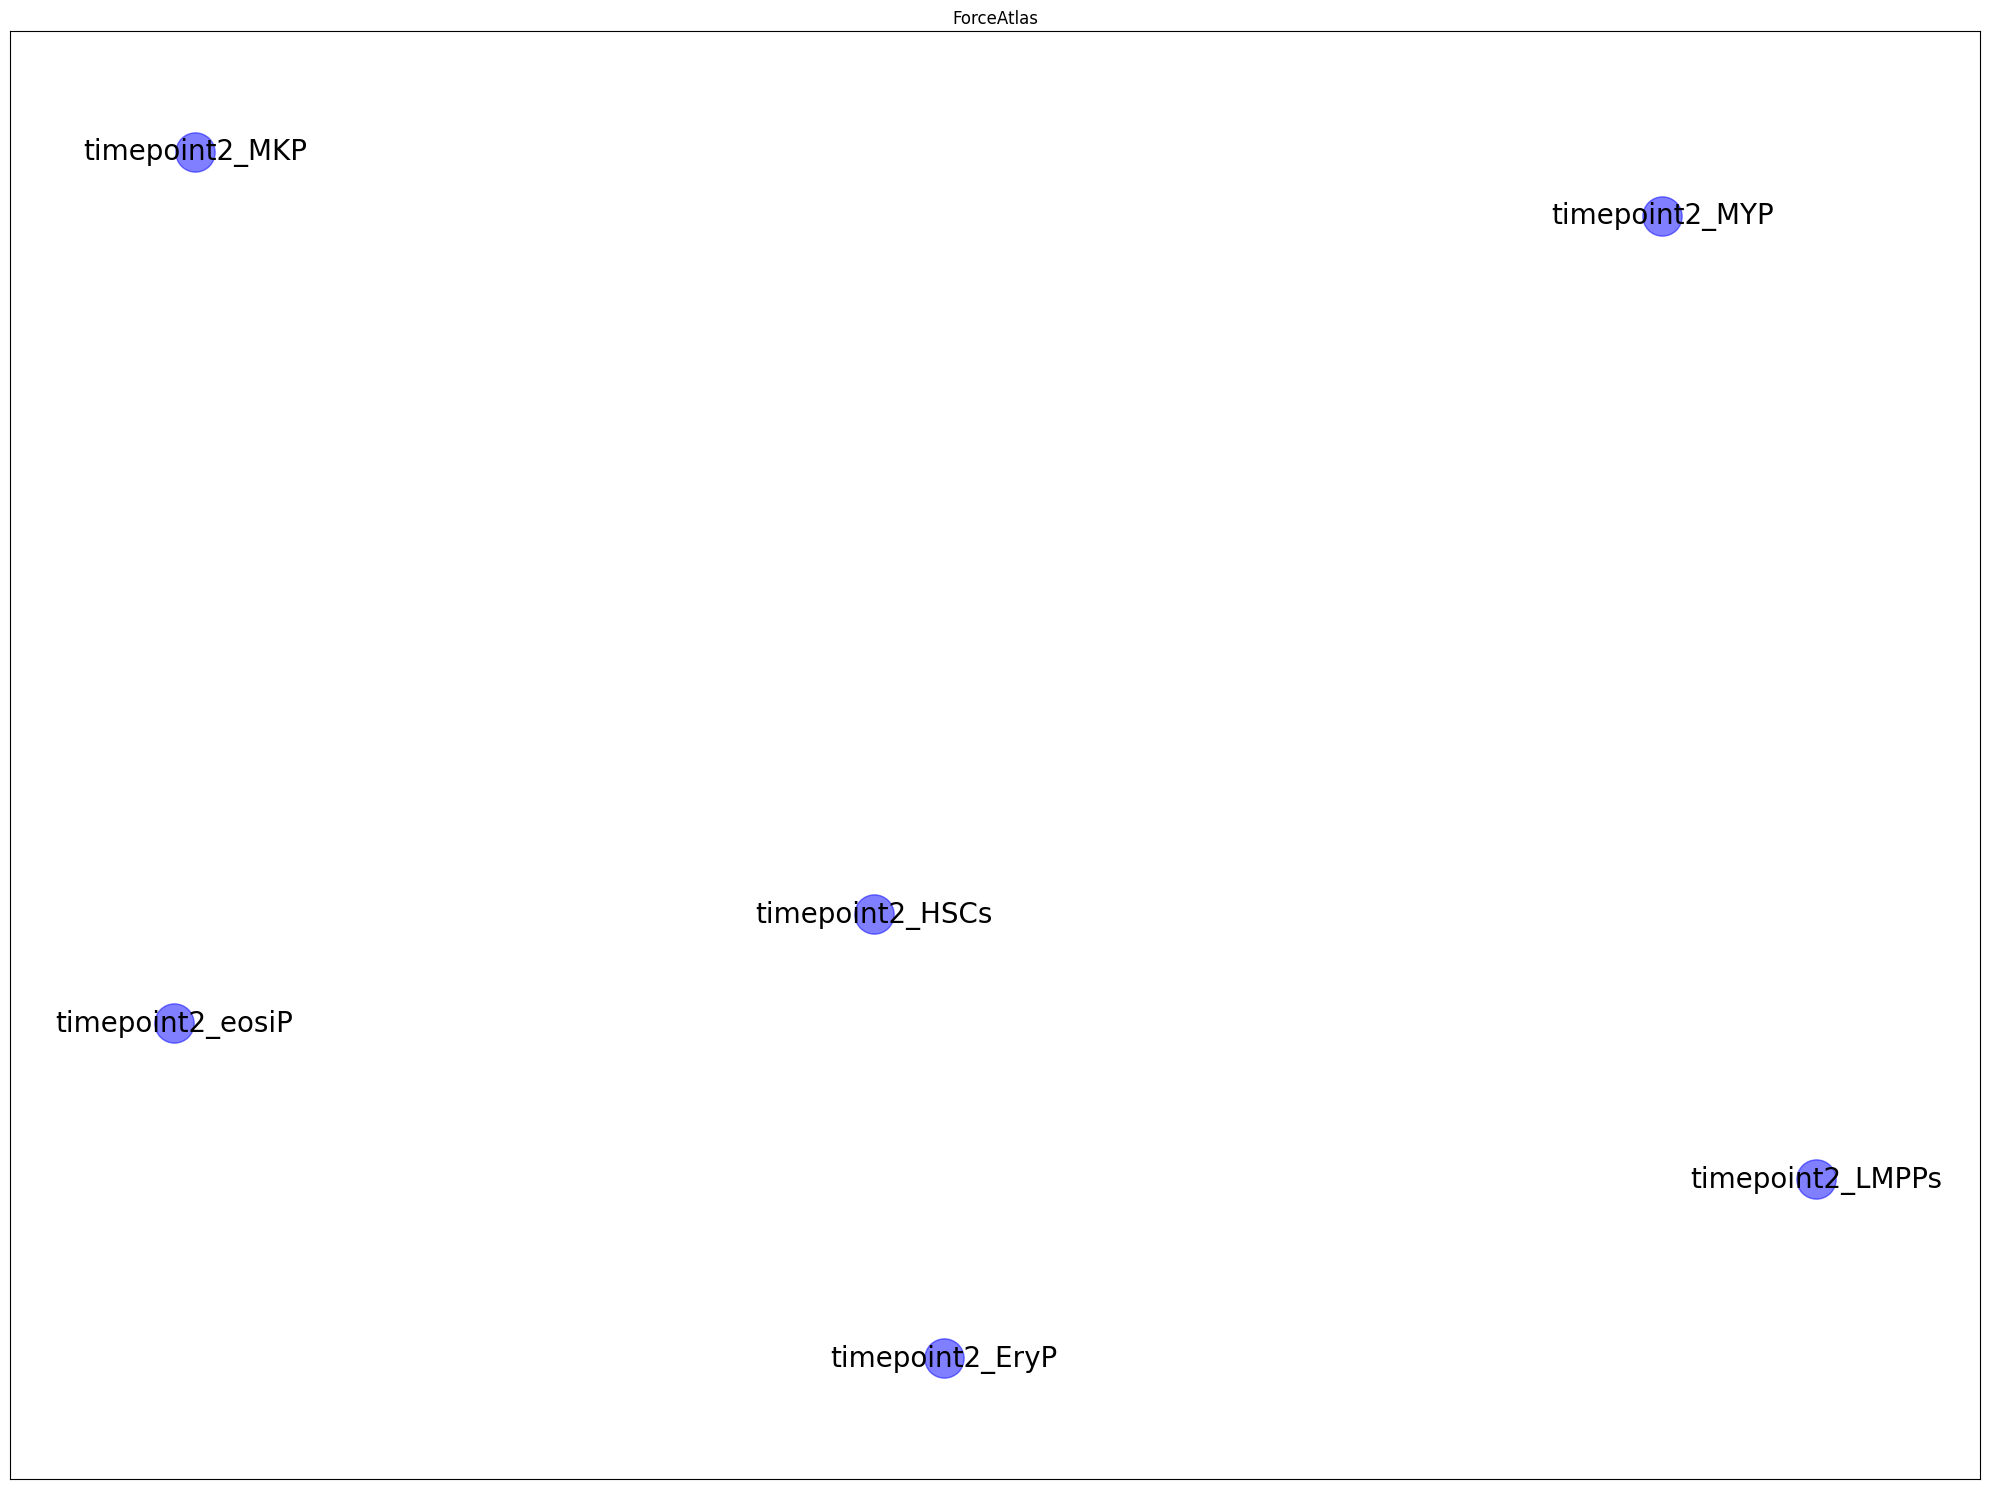

timepoint:3


100%|██████████| 2000/2000 [00:00<00:00, 84055.87it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


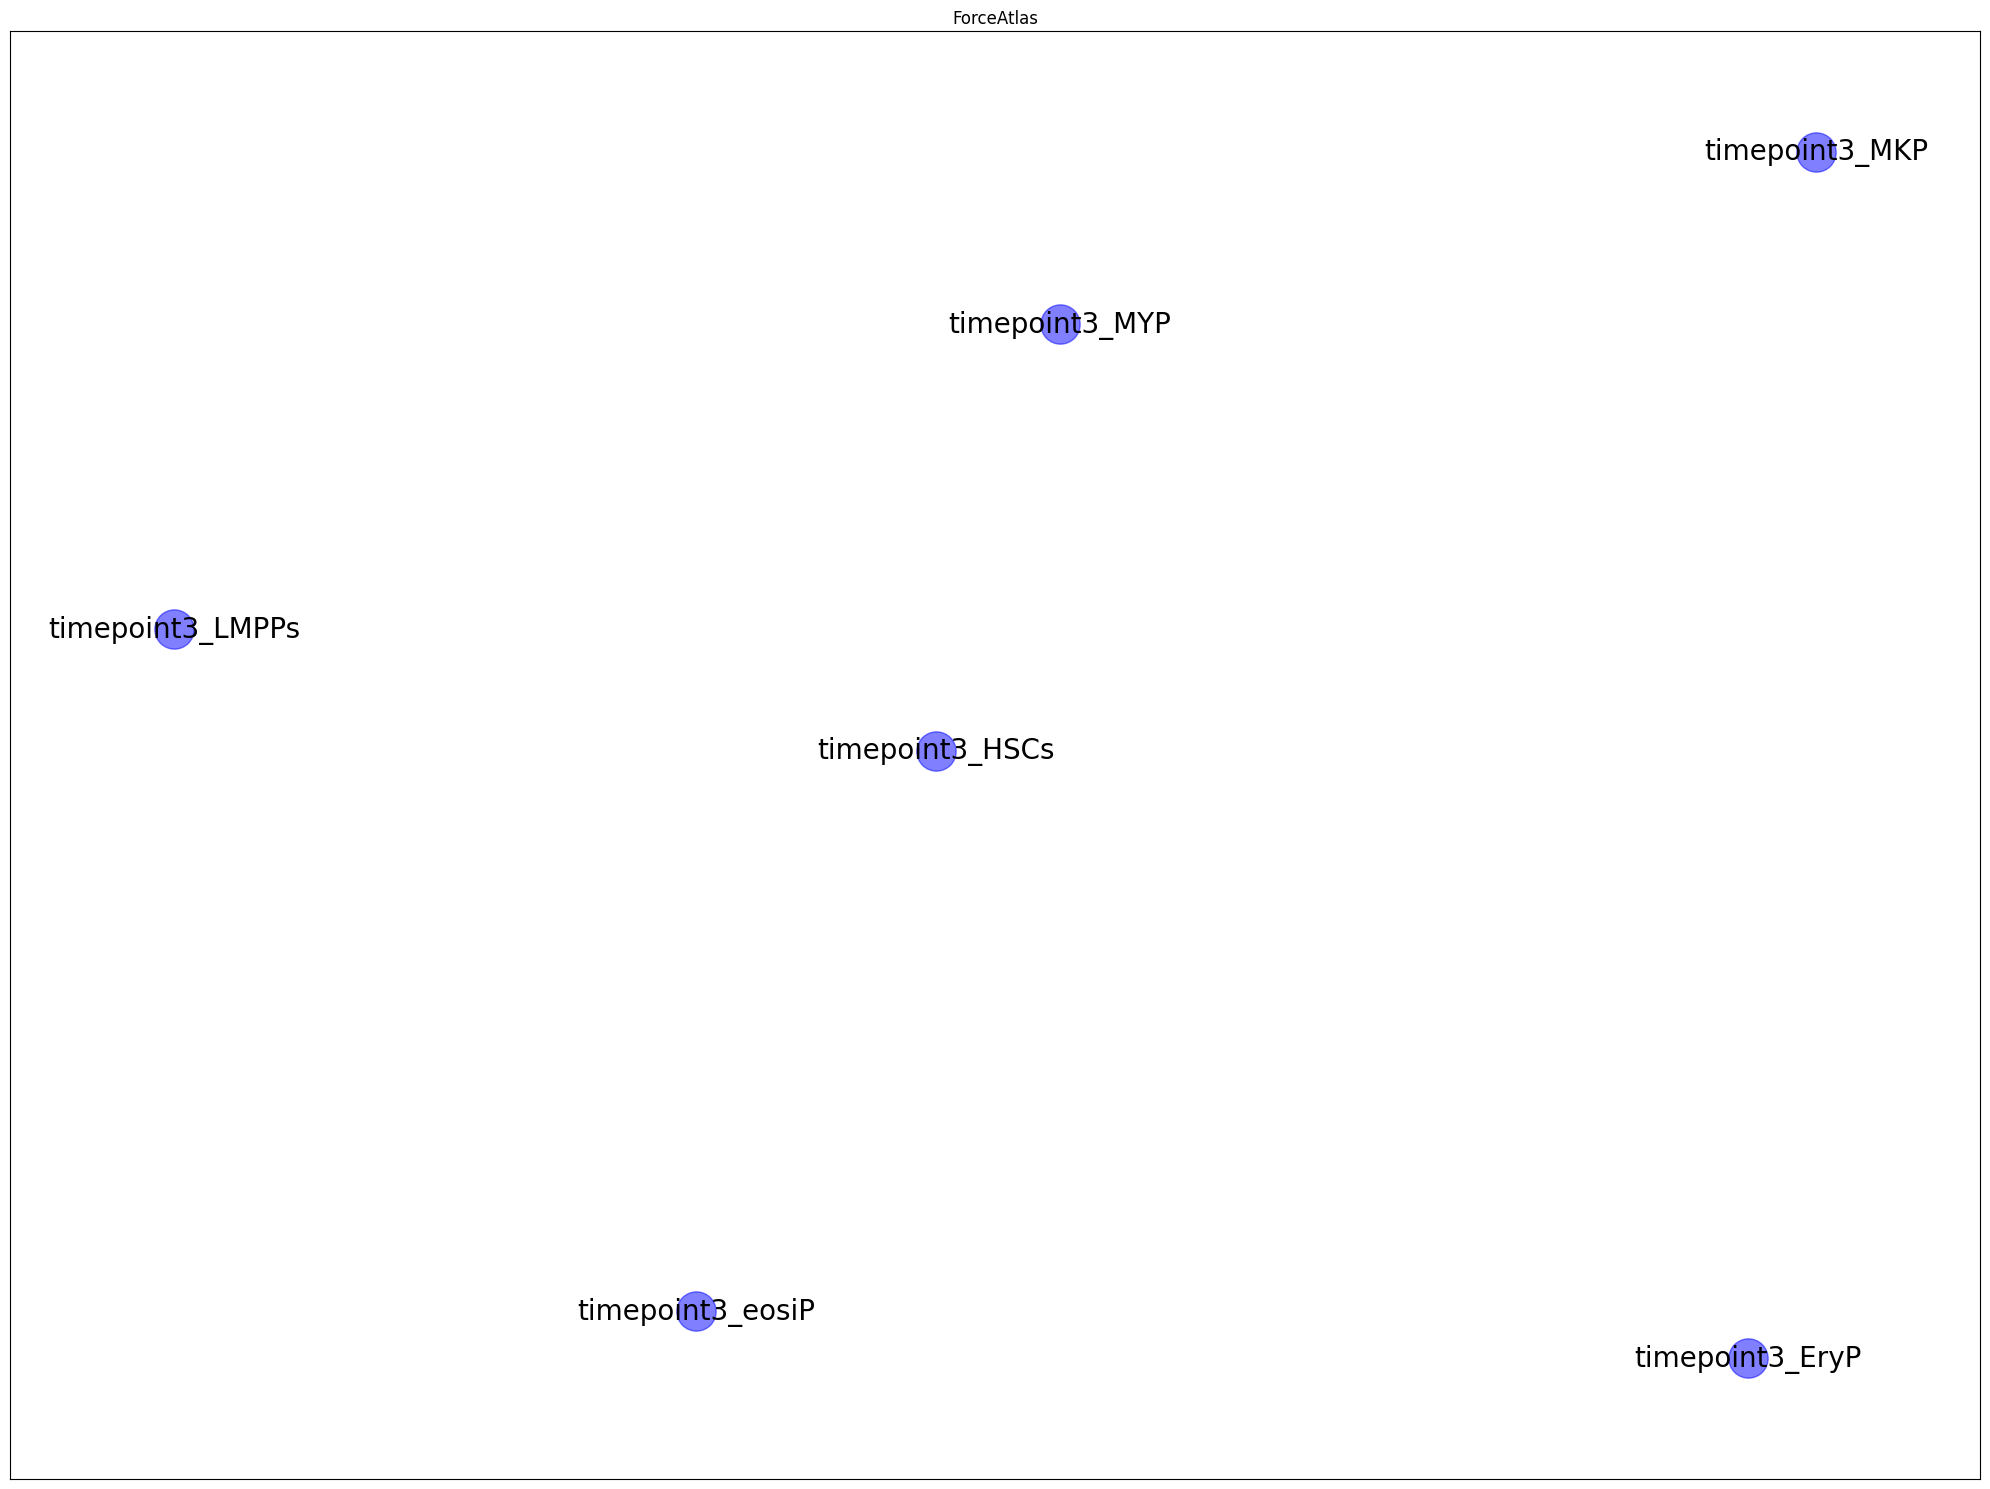

timepoint:4


100%|██████████| 2000/2000 [00:00<00:00, 85619.88it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


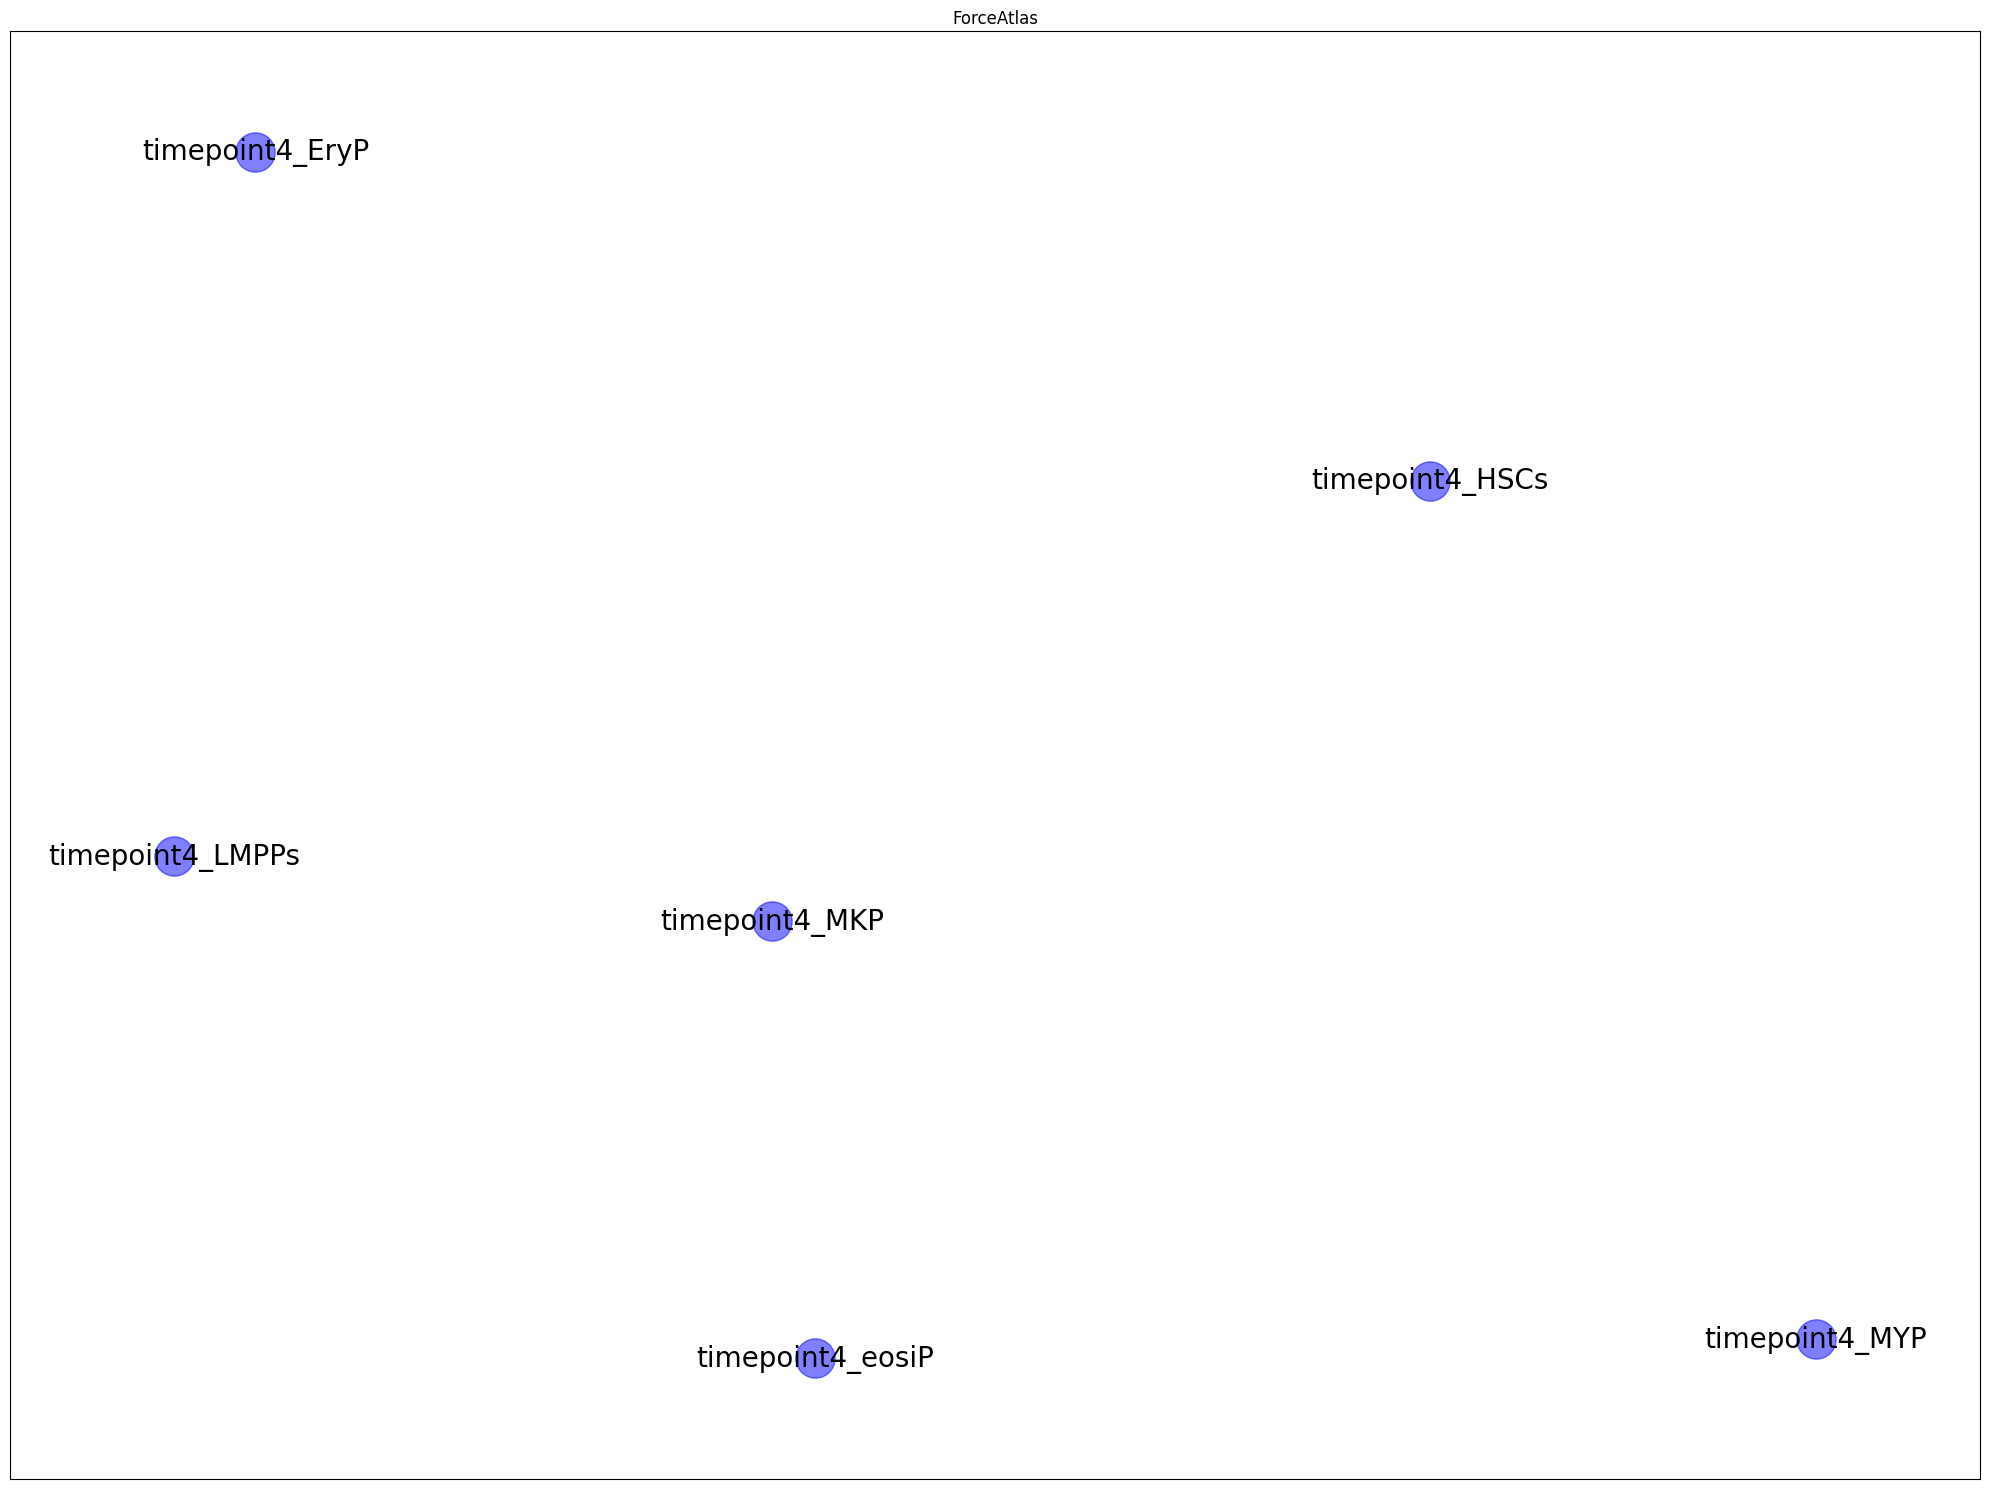


[Function: get_knn_nxG finished, spent time: 3.02s]


[Function: draw_nxG start...]



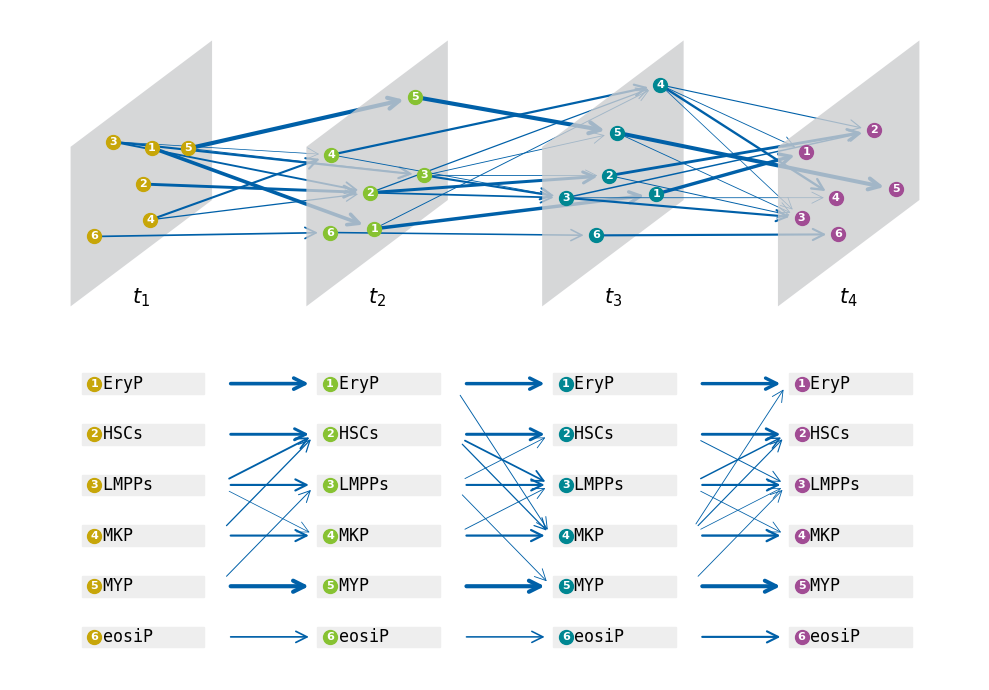


[Function: draw_nxG finished, spent time: 2.19s]


[Function: output_results start...]

timepoint:1
timepoint:2
timepoint:3
timepoint:4

[Function: output_results finished, spent time: 0.11s]


[Function: run_cstreet finished, spent time: 435.77s]



In [12]:
cdata.run_cstreet()

In [17]:
res_path = '/data1/home/jyj/PROJECT/2025/2025_GTra/analysis/BENCHMARK/CStreet/codes/CStreet_HSPC'

res = pd.read_csv(f'{res_path}/CStreet_HSPC_CellStatesConnCytoscape.txt', sep="\t")

In [21]:
import pandas as pd

# 1️⃣ Ground-truth transition rules 정의 (strict lineage version)
allowed = {
    "Eryp": {"Eryp"},
    "MKP": {"MKP"},
    "HSCs": {"HSCs","LMPPs"},
    "MYP": {"MYP", "eosiP", "MKP", "Eryp"},
    "LMPPs": {"LMPPs","MYP"},
    "eosiP": {"eosiP"}
}

def get_type(name):
    for t in allowed.keys():
        if t in name:
            return t
    return None

# 2️⃣ Ground truth edges DataFrame 만들기
true_edges = []
for from_label, to_list in allowed.items():
    for to_label in to_list:
        true_edges.append((from_label, to_label))
true_edges = pd.DataFrame(true_edges, columns=["from", "to"])

# 3️⃣ 문자열 결합 형태 (예: "HSCs_MYP")
true_set = set(true_edges.apply(lambda x: f"{x['from']}_{x['to']}", axis=1))

# 4️⃣ 확인
print(true_edges)
print(f"\nTotal edges in ground truth = {len(true_set)}")
print(true_set)


     from     to
0    Eryp   Eryp
1     MKP    MKP
2    HSCs  LMPPs
3    HSCs   HSCs
4     MYP   Eryp
5     MYP    MKP
6     MYP    MYP
7     MYP  eosiP
8   LMPPs  LMPPs
9   LMPPs    MYP
10  eosiP  eosiP

Total edges in ground truth = 11
{'MKP_MKP', 'MYP_MYP', 'HSCs_LMPPs', 'LMPPs_LMPPs', 'HSCs_HSCs', 'LMPPs_MYP', 'eosiP_eosiP', 'MYP_Eryp', 'MYP_eosiP', 'MYP_MKP', 'Eryp_Eryp'}


In [22]:
df = res[res['ConnectionProbabilities'] > cdata.params.Threshold_MinProbability]

import re

def extract_label(s):
    # "timepoint1_(1)3-APs/RPs" → "3-APs/RPs"
    return re.sub(r"^timepoint\d+_\(\d+\)", "", s)

df["from_state"] = df["SourceNode"].apply(extract_label)
df["to_state"] = df["TargetNode"].apply(extract_label)

In [23]:
# === 3️⃣ 예측 edge set 만들기 ===
# timepoint prefix 제거
def clean_name(name):
    # 예: 'timepoint1_HSCs' -> 'HSCs'
    if "_" in name:
        return name.split("_", 1)[1]
    return name

df["src_type"] = df["from_state"].apply(clean_name)
df["tgt_type"] = df["to_state"].apply(clean_name)

# 전이 문자열 (예: "HSCs_MYP")
pred_set = set(df.apply(lambda x: f"{x['src_type']}_{x['tgt_type']}", axis=1))

# === 4️⃣ 평가 ===
TP = len(pred_set & true_set)
FP = len(pred_set - true_set)
FN = len(true_set - pred_set)

precision = TP / (TP + FP + 1e-9)
recall = TP / (TP + FN + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)

# === 5️⃣ 결과 출력 ===
print("=== HSPCs Transition Evaluation ===")
print(f"TP = {TP}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"Precision = {precision:.3f}")
print(f"Recall = {recall:.3f}")
print(f"F1 = {f1:.3f}")

# (선택) 어떤 edge가 맞고 틀렸는지도 보고 싶다면
df["edge_str"] = df["src_type"] + "_" + df["tgt_type"]
df["is_correct"] = df["edge_str"].isin(true_set)
df[["src_type", "tgt_type", "ConnectionProbabilities", "is_correct"]]

=== HSPCs Transition Evaluation ===
TP = 7
FP = 9
FN = 4
Precision = 0.437
Recall = 0.636
F1 = 0.519


,src_type,tgt_type,ConnectionProbabilities,is_correct
0,EryP,EryP,0.44614,False
7,HSCs,HSCs,0.35622,True
13,LMPPs,HSCs,0.22934,False
14,LMPPs,LMPPs,0.26250,True
15,LMPPs,MKP,0.09047,False
19,MKP,HSCs,0.15615,False
21,MKP,MKP,0.25796,True
26,MYP,LMPPs,0.12060,False
28,MYP,MYP,0.51095,True
35,eosiP,eosiP,0.20903,True


In [24]:
pred_set

{'EryP_EryP',
 'EryP_MKP',
 'HSCs_HSCs',
 'HSCs_LMPPs',
 'HSCs_MKP',
 'LMPPs_HSCs',
 'LMPPs_LMPPs',
 'LMPPs_MKP',
 'LMPPs_MYP',
 'MKP_EryP',
 'MKP_HSCs',
 'MKP_LMPPs',
 'MKP_MKP',
 'MYP_LMPPs',
 'MYP_MYP',
 'eosiP_eosiP'}

In [76]:
pred_df

,SourceNode,TargetNode,ConnectionProbabilities,95ConfidenceIntervals,from_state,to_state
0,timepoint1_EryP,timepoint2_EryP,0.44614,"(0.43533,0.45694)",timepoint1_EryP,timepoint2_EryP
7,timepoint1_HSCs,timepoint2_HSCs,0.35622,"(0.35129,0.36116)",timepoint1_HSCs,timepoint2_HSCs
13,timepoint1_LMPPs,timepoint2_HSCs,0.22934,"(0.22605,0.23262)",timepoint1_LMPPs,timepoint2_HSCs
14,timepoint1_LMPPs,timepoint2_LMPPs,0.26250,"(0.25825,0.26676)",timepoint1_LMPPs,timepoint2_LMPPs
15,timepoint1_LMPPs,timepoint2_MKP,0.09047,"(0.08790,0.09303)",timepoint1_LMPPs,timepoint2_MKP
19,timepoint1_MKP,timepoint2_HSCs,0.15615,"(0.15335,0.15895)",timepoint1_MKP,timepoint2_HSCs
21,timepoint1_MKP,timepoint2_MKP,0.25796,"(0.25253,0.26339)",timepoint1_MKP,timepoint2_MKP
26,timepoint1_MYP,timepoint2_LMPPs,0.12060,"(0.11441,0.12678)",timepoint1_MYP,timepoint2_LMPPs
28,timepoint1_MYP,timepoint2_MYP,0.51095,"(0.49113,0.53077)",timepoint1_MYP,timepoint2_MYP
35,timepoint1_eosiP,timepoint2_eosiP,0.20903,"(0.19953,0.21853)",timepoint1_eosiP,timepoint2_eosiP


In [79]:
true_set

{'EryP_EryP',
 'HSCs_HSCs',
 'HSCs_LMPPs',
 'HSCs_MYP',
 'LMPPs_LMPPs',
 'LMPPs_MYP',
 'MKP_MKP',
 'MYP_EryP',
 'MYP_MKP',
 'MYP_MYP',
 'MYP_eosiP',
 'eosiP_eosiP'}

In [77]:
# 4️⃣ 예측 edge 세트 생성
pred_set = set(pred_df.apply(lambda x: f"{x['from_state']}_{x['to_state']}", axis=1))

# 5️⃣ TP, FP, FN 계산
TP = len(pred_set & true_set)
FP = len(pred_set - true_set)
FN = len(true_set - pred_set)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score  = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"TP: {TP}, FP: {FP}, FN: {FN}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

TP: 0, FP: 35, FN: 12
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [78]:
pred_set

{'timepoint1_EryP_timepoint2_EryP',
 'timepoint1_HSCs_timepoint2_HSCs',
 'timepoint1_LMPPs_timepoint2_HSCs',
 'timepoint1_LMPPs_timepoint2_LMPPs',
 'timepoint1_LMPPs_timepoint2_MKP',
 'timepoint1_MKP_timepoint2_HSCs',
 'timepoint1_MKP_timepoint2_MKP',
 'timepoint1_MYP_timepoint2_LMPPs',
 'timepoint1_MYP_timepoint2_MYP',
 'timepoint1_eosiP_timepoint2_eosiP',
 'timepoint2_EryP_timepoint3_EryP',
 'timepoint2_EryP_timepoint3_MKP',
 'timepoint2_HSCs_timepoint3_HSCs',
 'timepoint2_HSCs_timepoint3_LMPPs',
 'timepoint2_HSCs_timepoint3_MKP',
 'timepoint2_LMPPs_timepoint3_HSCs',
 'timepoint2_LMPPs_timepoint3_LMPPs',
 'timepoint2_LMPPs_timepoint3_MYP',
 'timepoint2_MKP_timepoint3_LMPPs',
 'timepoint2_MKP_timepoint3_MKP',
 'timepoint2_MYP_timepoint3_MYP',
 'timepoint2_eosiP_timepoint3_eosiP',
 'timepoint3_EryP_timepoint4_EryP',
 'timepoint3_HSCs_timepoint4_HSCs',
 'timepoint3_HSCs_timepoint4_LMPPs',
 'timepoint3_LMPPs_timepoint4_HSCs',
 'timepoint3_LMPPs_timepoint4_LMPPs',
 'timepoint3_LMPPs_timep

In [ ]:
pred_df = res[res['ConnectionProbabilities'] > cdata.params.Threshold_MinProbability]